# Realtime ASR

Let say you want to transcribe realtime recording / input, malaya-speech able to do that.

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [malaya-speech/example/realtime-asr](https://github.com/huseinzol05/malaya-speech/tree/master/example/realtime-asr).
    
</div>

<div class="alert alert-warning">

This module is not language independent, so it not save to use on different languages. Pretrained models trained on hyperlocal languages.
    
</div>

<div class="alert alert-warning">

This is an application of malaya-speech Pipeline, read more about malaya-speech Pipeline at [malaya-speech/example/pipeline](https://github.com/huseinzol05/malaya-speech/tree/master/example/pipeline).
    
</div>

In [1]:
import malaya_speech
from malaya_speech import Pipeline

### Load VAD model

We are going to use quantized vggvox-v2 VAD model.

In [2]:
vad_model = malaya_speech.vad.deep_model(model = 'vggvox-v2', quantized = True)

### Recording interface

So, to start recording audio including realtime VAD and ASR, we need to use `malaya_speech.streaming.record`. We use `pyaudio` library as the backend.

```python
def record(
    vad,
    asr_model = None,
    device = None,
    input_rate: int = 16000,
    sample_rate: int = 16000,
    min_length: float = 0.1,
    filename: str = None,
    spinner: bool = True,
):
    """
    Record an audio using pyaudio library. This record interface required a VAD model.

    Parameters
    ----------
    vad: object
        vad model / pipeline.
    asr_model: object
        ASR model / pipeline, will transcribe each subsamples realtime.
    device: None
        `device` parameter for pyaudio.
    input_rate: int, optional (default = 16000)
        sample rate from input device, this will auto resampling.
    sample_rate: int, optional (default = 16000)
        output sample rate.
    min_length: float, optional (default=0.1)
        minimum length (s) to accept a subsample.
    filename: str, optional (default=None)
        if None, will auto generate name based on timestamp.
    spinner: bool, optional (default=True)
        if True, will use spinner object from halo library.


    Returns
    -------
    result : [filename, samples]
    """
```

**pyaudio will returned int16 bytes, so we need to change to numpy array, normalize it to -1 and +1 floating point**.

### Check available devices

In [3]:
import sounddevice

sounddevice.query_devices()

> 0 External Microphone, Core Audio (1 in, 0 out)
< 1 External Headphones, Core Audio (0 in, 2 out)
  2 MacBook Pro Microphone, Core Audio (1 in, 0 out)
  3 MacBook Pro Speakers, Core Audio (0 in, 2 out)

By default it will use `0` index.

### VAD pipeline

Because pyaudio will returned int16 bytes, so we need to change to numpy array then normalize to float.

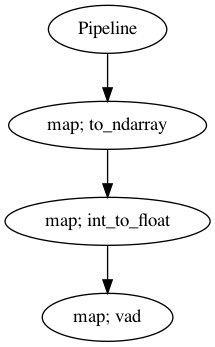

In [4]:
p = Pipeline()
pipeline = (
    p.map(malaya_speech.astype.to_ndarray)
    .map(malaya_speech.astype.int_to_float)
    .map(vad_model)
)
p.visualize()

### Load ASR model

In [5]:
quantized_model = malaya_speech.stt.deep_ctc(model = 'mini-jasper', quantized = True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


### ASR Pipeline

Because pyaudio will returned int16 bytes, so we need to change to numpy array then normalize to float, feel free to add speech enhancement or any function, but in this example, I just keep it simple.

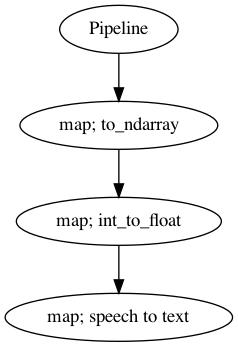

In [6]:
p_asr = Pipeline()
pipeline_asr = (
    p_asr.map(malaya_speech.astype.to_ndarray)
    .map(malaya_speech.astype.int_to_float)
    .map(quantized_model)
)
p_asr.visualize()

**Again, once you start to run the code below, it will straight away recording your voice**. 

If you run in jupyter notebook, press button stop up there to stop recording, if in terminal, press `CTRL + c`.

In [7]:
file, samples = malaya_speech.streaming.record(vad = p, asr_model = p_asr, spinner = False)
file

Listening (ctrl-C to stop recording) ... 



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=512 is too small for input signal of length=320
  n_fft, y.shape[-1]


Sample 0 2020-12-01 19:19:23.729132: halau
Sample 1 2020-12-01 19:19:26.456911: nama saya
Sample 2 2020-12-01 19:19:28.634538: pusan
Sample 3 2020-12-01 19:19:31.363318: bukan pusan
Sample 4 2020-12-01 19:19:33.877126: usin
Sample 5 2020-12-01 19:19:37.636897: ya husin pun boleh
Sample 6 2020-12-01 19:19:40.864668: saya suka makan ayam
Sample 7 2020-12-01 19:19:44.096512: ayam goreng
Sample 8 2020-12-01 19:19:47.155470: sedap juga
Sample 9 2020-12-01 19:19:49.857779: asli
Sample 10 2020-12-01 19:19:52.537023: basli
Sample 11 2020-12-01 19:19:55.402922: bukan asli
Sample 12 2020-12-01 19:19:58.438952: exsuali
Sample 13 2020-12-01 19:20:01.885902: pun boleh
Sample 14 2020-12-01 19:20:05.688788: jadi sebenarnya
Sample 15 2020-12-01 19:20:11.035315: model ini hanya boleh paham bahasa melayu
Sample 16 2020-12-01 19:20:14.654686: terima kasih
saved audio to savewav_2020-12-01_19-20-16_316766.wav


'savewav_2020-12-01_19-20-16_316766.wav'

Actually it is pretty nice. As you can see, it able to transcribe realtime, you can try it by yourself.

In [10]:
import IPython.display as ipd

ipd.Audio(file)

In [11]:
len(samples[0])

2

In [12]:
type(samples[0][0]), samples[0][1]

(bytearray, 'halau')

I do not want to print `samples[0][0]`, it is very long.